In [1]:
import sys
sys.path.insert(1, '../src')
import condensate_analysis as ca
import matplotlib.pyplot as plt

In [61]:
# Import: Image file -> numpy array
def read_image(file):
"""Read image into numpy ndarray.

Should handle nd2, czi, tif, and other common file type.
Handling is based on file extention only.
Dimension order is set with the convention: Channel, Slice, Row, Col.
"""
    if file.endswith(".czi"):
        img = czifile.imread(file).squeeze() # remove dummy dimensions
    elif file.endswith(".nd2"):
        img = nd2.imread(file)
        img = img.swapaxes(0,1) # places channel before slice
    else:
        try:
            img = skimage.io.imread(file)
            img = img.swapaxes(0,1) # I think this is also necessary here, but not sure. 
            # Consider checking for larger value between slice and channel for placement.
        except OSError:
            print("Invalid file extention")
    return img

# Mask: numpy array -> blob mask
    # should accept 2D or 3D
    # segmentaion methods: Otzu threshold,
    # dilation or constriction option
    # watershed option

# Featurize: array, mask, feature_list -> features table
    # X, Y, Area, MaxIntensity, SumIntensity, Circulatiry


IndentationError: expected an indented block after function definition on line 2 (4137574293.py, line 3)

In [2]:
img = ca.read_image("../testdata/test.nd2")
print(img.shape)
img = ca.read_image("../testdata/test.czi")
print(img.shape)

(2, 21, 2048, 2048)
(2, 15, 512, 512)


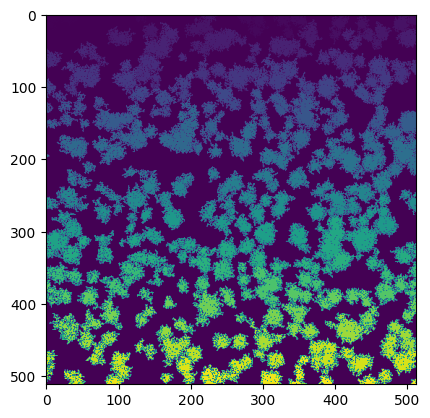

In [3]:
masked = ca.mask_image(img[0,0], watershed=True)
plt.imshow(masked[:,:])